In [72]:
from google.colab import drive
drive.mount('/content/drive/')

# Notre repertoire de travail
%cd drive/MyDrive/coursiap/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
[Errno 2] No such file or directory: 'drive/MyDrive/coursiap/'
/content/drive/MyDrive/coursiap/Apprentissage_Artificiel_INF4248


In [73]:
%cd Apprentissage_Artificiel_INF4248/

[Errno 2] No such file or directory: 'Apprentissage_Artificiel_INF4248/'
/content/drive/MyDrive/coursiap/Apprentissage_Artificiel_INF4248


In [74]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [75]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

## suppression des variables inutiles ##

In [76]:

X = df.iloc[:, 3:13].values
y = df.iloc[:, 13].values

display(X)
display(y)

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

array([1, 0, 1, ..., 1, 1, 0])

## Encodage de données catégorielles.. ##

In [77]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X_1 = LabelEncoder()

X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])

labelencoder_X_2 = LabelEncoder()

X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

onehotencorder = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [1])],remainder='passthrough')

X = onehotencorder.fit_transform(X)

X = X[:, 1:]
X = pd.DataFrame(X)
X



0    1    2  3   4   5          6  7  8  9          10
0     0.0  0.0  619  0  42   2        0.0  1  1  1  101348.88
1     0.0  1.0  608  0  41   1   83807.86  1  0  1  112542.58
2     0.0  0.0  502  0  42   8   159660.8  3  1  0  113931.57
3     0.0  0.0  699  0  39   1        0.0  2  0  0   93826.63
4     0.0  1.0  850  0  43   2  125510.82  1  1  1    79084.1
...   ...  ...  ... ..  ..  ..        ... .. .. ..        ...
9995  0.0  0.0  771  1  39   5        0.0  2  1  0   96270.64
9996  0.0  0.0  516  1  35  10   57369.61  1  1  1  101699.77
9997  0.0  0.0  709  0  36   7        0.0  1  0  1   42085.58
9998  1.0  0.0  772  1  42   3   75075.31  2  1  0   92888.52
9999  0.0  0.0  792  0  28   4  130142.79  1  1  0   38190.78

[10000 rows x 11 columns]

# Modelisation #

In [78]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_test

0    1    2  3   4  5          6  7  8  9          10
9394  1.0  0.0  597  0  35  8  131101.04  1  1  1  192852.67
898   0.0  0.0  523  0  40  2  102967.41  1  1  0   128702.1
2398  0.0  1.0  706  0  42  8   95386.82  1  1  1   75732.25
5906  0.0  0.0  788  1  32  4  112079.58  1  0  0   89368.59
2343  1.0  0.0  706  1  38  5  163034.82  2  1  1  135662.17
...   ...  ...  ... ..  .. ..        ... .. .. ..        ...
1037  0.0  0.0  625  0  24  1        0.0  2  1  1  180969.55
2899  0.0  0.0  586  0  35  7        0.0  2  1  0   70760.69
9549  0.0  1.0  578  1  36  1  157267.95  2  1  0  141533.19
2740  1.0  0.0  650  1  34  4  142393.11  1  1  1   11276.48
6690  1.0  0.0  573  1  30  8   127406.5  1  1  0   192950.6

[2000 rows x 11 columns]

# normalisation #

In [79]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test

array([[ 1.75486502, -0.57369368, -0.55204276, ...,  0.64259497,
         0.9687384 ,  1.61085707],
       [-0.5698444 , -0.57369368, -1.31490297, ...,  0.64259497,
        -1.03227043,  0.49587037],
       [-0.5698444 ,  1.74309049,  0.57162971, ...,  0.64259497,
         0.9687384 , -0.42478674],
       ...,
       [-0.5698444 ,  1.74309049, -0.74791227, ...,  0.64259497,
        -1.03227043,  0.71888467],
       [ 1.75486502, -0.57369368, -0.00566991, ...,  0.64259497,
         0.9687384 , -1.54507805],
       [ 1.75486502, -0.57369368, -0.79945688, ...,  0.64259497,
        -1.03227043,  1.61255917]])

**Reseau de Neuronnes**

In [80]:
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()


In [81]:
# première couche cachée
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

# deuxième couche cachée
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

In [82]:
# couche de sortie
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


In [83]:
# Compilation avec l'Optimiseur ADAM 
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Copy model ::::RMS PROP
model_RMS= keras.models.clone_model(classifier)
#model_copy.build((None, 10)) # replace 10 with number of variables in input layer
model_RMS.compile(optimizer='RMSprop', loss='binary_crossentropy')
#model_copy.set_weights(model.get_weights())

# Copy model ::::ADAGRAD
model_ADAGRAD= keras.models.clone_model(classifier)
#model_copy.build((None, 10)) # replace 10 with number of variables in input layer
model_ADAGRAD.compile(optimizer='Adagrad', loss='binary_crossentropy')
#model_copy.set_weights(model.get_weights())


# Copy model ::::ADADELTA
model= keras.models.clone_model(classifier)
#model_copy.build((None, 10)) # replace 10 with number of variables in input layer
model_ADT.compile(optimizer='Adadelta', loss='binary_crossentropy')
#model_copy.set_weights(model.get_weights())

# Copy model ::::ADAMAX
model_ADMAX= keras.models.clone_model(classifier)
#model_copy.build((None, 10)) # replace 10 with number of variables in input layer
model_ADMAX.compile(optimizer='Adamax', loss='binary_crossentropy')
#model_copy.set_weights(model.get_weights())

# Copy model ::::NADAM
model_NADAM= keras.models.clone_model(classifier)
#model_copy.build((None, 10)) # replace 10 with number of variables in input layer
model_NADAM.compile(optimizer='Nadam', loss='binary_crossentropy')
#model_copy.set_weights(model.get_weights())

# Copy model :::: SGD
model_SGD= keras.models.clone_model(classifier)
#model_copy.build((None, 10)) # replace 10 with number of variables in input layer
model_SGD.compile(optimizer='SGD', loss='binary_crossentropy')
#model_copy.set_weights(model.get_weights())

# entrainement #

In [84]:
# Compiling the ANN

training_RMS = model_RMS.fit(X_train, y_train, batch_size = 10, epochs = 100)

training_ADAGRAD = model_ADAGRAD.fit(X_train, y_train, batch_size = 10, epochs = 100)

training_ADT = model_ADT.fit(X_train, y_train, batch_size = 10, epochs = 100)

training_ADM = model_ADMAX.fit(X_train, y_train, batch_size = 10, epochs = 100)

training_NADAM = model_NADAM.fit(X_train, y_train, batch_size = 10, epochs = 100)

training_SGD = model_SGD.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
800/800 [==============================] - 2s 1ms/step - loss: 0.5320
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4353
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4290
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4245
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4212
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4184
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4164
Epoch 8/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4145
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4132
Epoch 10/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4115
Epoch 11/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4105
Epoch 12/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4090
Epoch 13/100


In [85]:
training_ADAM = classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)



Epoch 1/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4818 - accuracy: 0.7954
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4264 - accuracy: 0.7960
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4205 - accuracy: 0.8048
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4171 - accuracy: 0.8250
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4149 - accuracy: 0.8280
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4134 - accuracy: 0.8309
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4117 - accuracy: 0.8310
Epoch 8/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4109 - accuracy: 0.8332
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4092 - accuracy: 0.8328
Epoch 10/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4088 - accura

In [86]:
model_ADAGRAD.save('model_ADAGRAD.h5')

model_RMS.save('model_RMS.h5')

model_ADT.save('model_ADT.h5')

model_ADMAX.save('model_ADAMAX.h5')

model_NADAM.save('model_NADAM.h5')

model_SGD.save('model_SGD.h5')

model.save('model_ADAM.h5')

# prédictions et évaluation du modèle #

In [87]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [88]:
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [89]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1549   46]
 [ 264  141]]


In [90]:
classifier.save('churn.h5')

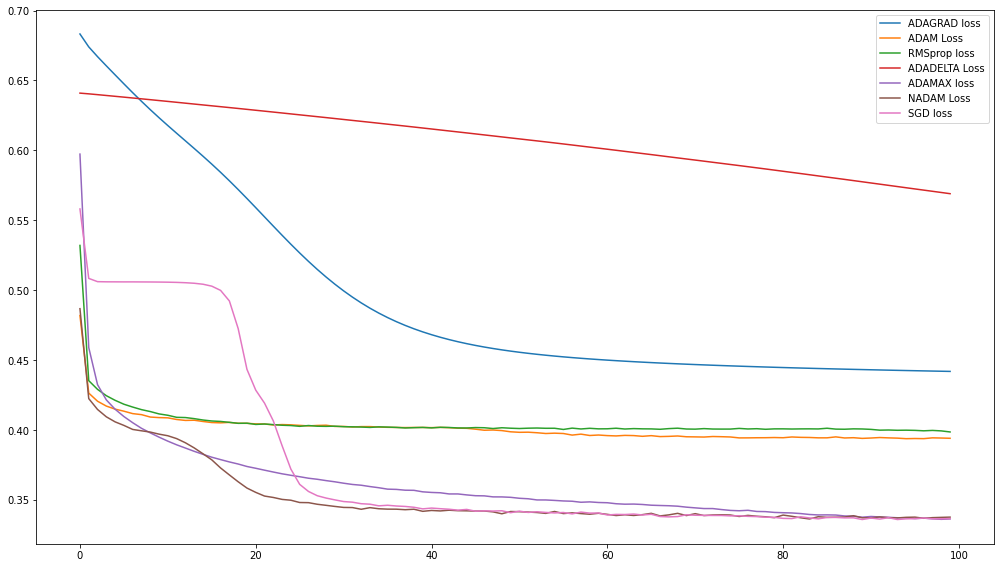

In [91]:
historique_ADAM = pd.DataFrame(training_ADAM.history)
historique_ADAM['epoque'] = training_ADAM.epoch

historique_ADAG = pd.DataFrame(training_ADAGRAD.history)
historique_ADAG['epoque'] = training_ADAGRAD.epoch

historique_RMS = pd.DataFrame(training_RMS.history)
historique_RMS['epoque'] = training_RMS.epoch

historique_ADT = pd.DataFrame(training_ADT.history)
historique_ADT['epoque'] = training_ADT.epoch

historique_ADMAX = pd.DataFrame(training_ADM.history)
historique_ADMAX['epoque'] = training_ADM.epoch

historique_NADAM = pd.DataFrame(training_NADAM.history)
historique_NADAM['epoque'] = training_NADAM.epoch

historique_SGD = pd.DataFrame(training_SGD.history)
historique_SGD['epoque'] = training_SGD.epoch






figure, axe = plt.subplots(figsize = (14,8))
num_epoque = historique.shape[0]
#num_epoque2 = historique2.shape[0]
#axe.plot(np.arange(0, num_epoque), historique2["loss"],
 #        label = "Adagrad loss", lw = 3, color = 'red')
#axe.plot(np.arange(0, num_epoque), historique_ADAM["loss"],label = "Loss ADAM", lw = 3, color = 'blue')

plt.plot(historique_ADAG['loss'], label='ADAGRAD loss')
plt.plot(historique_ADAM["loss"],label = "ADAM Loss")
plt.plot(historique_RMS['loss'], label='RMSprop loss')
plt.plot(historique_ADT["loss"],label = "ADADELTA Loss")
plt.plot(historique_ADMAX['loss'], label='ADAMAX loss')
plt.plot(historique_NADAM["loss"],label = "NADAM Loss")
plt.plot(historique_SGD['loss'], label='SGD loss')
axe.legend()
plt.tight_layout()
plt.show()

In [ ]:
!git add .
!git config --global user.email "armel.njike@yahoo.com"
!git config --global user.name "armelnjike"
!git commit -m " ADAGRAD OPTIMIZER"
!git push origin master

 ## **DISCUTIONS** ##


* Classement par vitesse de convergence





1.   ADAM
2.   RMSProp
3.   SGD
4.   NADAM
5.   ADAMAX
6.   ADAGRAD
7.   ADADELTA



* Classement par precision


1.   NADAM
2.   SGD
3.   ADAMAX
4.   ADAM
5.   RMSProp
6.   ADAGRAD
7.   ADADELTA 









